In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyBigWig as bw
import h5py

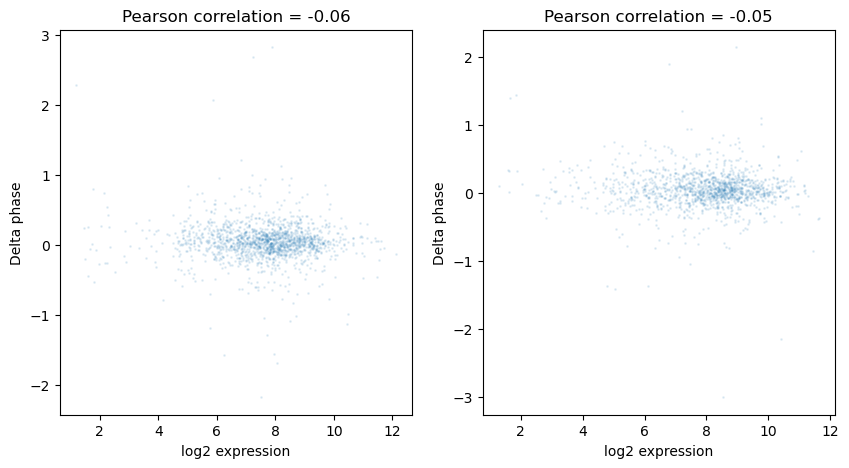

In [41]:

bin_size = 10000
bin_phase_amp = {}
bin_phase_amp['+'] = pd.read_csv(f'../results/phase_amp/bin_phase_amp_forward_{bin_size}bp.csv',sep='\t')
bin_phase_amp['-'] = pd.read_csv(f'../results/phase_amp/bin_phase_amp_reverse_{bin_size}bp.csv',sep='\t')

fig, axes = plt.subplots(1,2,figsize=(10,5))

for strand in ['+','-']:

    r2 = .5*(bin_phase_amp[strand]['R2'].values[1:]+bin_phase_amp[strand]['R2'].values[:-1])

    if strand == '+':
        d_phase = bin_phase_amp[strand]['phase'].values[1:] - bin_phase_amp[strand]['phase'].values[:-1]
        expression = bin_phase_amp[strand]['mean_log_expression'].values[1:]

    if strand == '-':
        d_phase = bin_phase_amp[strand]['phase'].values[1:] - bin_phase_amp[strand]['phase'].values[:-1]
        d_phase = -d_phase[::-1]
        expression = bin_phase_amp[strand]['mean_log_expression'].values[:-1][::-1]
        r2 = r2[::-1]
    
    # make sure Delta phase is between -pi and pi
    d_phase = (d_phase + np.pi) % (2*np.pi) - np.pi

    idx_r2 = r2>0.8

    ax = axes[0] if strand == '+' else axes[1]

    ax.scatter(expression[idx_r2],d_phase[idx_r2],s=1,alpha=0.1)
    ax.set_title(f'Pearson correlation = {np.corrcoef(expression[idx_r2],d_phase[idx_r2])[0,1]:.2f}')
    ax.set_xlabel(f'log2 expression')
    ax.set_ylabel(f'Delta phase')

,chr,start,end,strand,phase,amplitude,R2,pval,mean_log_expression
0,chr1,3057000,3058000,+,2.094395,0.183039,0.181818,0.405344,0.045760
1,chr1,3128000,3129000,+,2.094395,0.229903,0.181818,0.405344,0.057476
2,chr1,3174000,3175000,+,3.141593,0.217163,0.181818,0.405344,0.054291
3,chr1,3176000,3177000,+,2.094395,0.883733,0.181818,0.405344,0.220933
4,chr1,3185000,3186000,+,5.235988,0.707548,0.181818,0.405344,0.176887
...,...,...,...,...,...,...,...,...,...
900716,chrM,12000,13000,+,6.071135,0.441480,0.795346,0.000794,9.161334
900717,chrM,13000,14000,+,5.684769,0.713430,0.606170,0.015097,7.962832
900718,chrM,14000,15000,+,6.085301,0.373518,0.627172,0.011797,9.721937
900719,chrM,15000,16000,+,6.007008,0.561995,0.822440,0.000419,7.502958
